In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import shutil
from keras import optimizers
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from keras import backend as K

In [21]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
train_dir = "C:\\Users\\OMER\\Desktop\\Doktora\\Third_Tik\\Covid19_Results\\Train"
validation_dir = "C:\\Users\\OMER\\Desktop\\Doktora\\Third_Tik\\Covid19_Results\\Validation"
model.compile(loss = "binary_crossentropy",
             optimizer = "rmsprop",
             metrics=[f1,"accuracy"])

In [31]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)


test_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [32]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(64, 64),
batch_size=5,
class_mode='binary')

Found 130 images belonging to 2 classes.


In [33]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(64, 64),
batch_size=5,
class_mode='binary')

Found 6 images belonging to 2 classes.


In [36]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 27s 269ms/step - loss: 0.2283 - f1: 0.9163 - acc: 0.9240 - val_loss: 0.3827 - val_f1: 0.7100 - val_acc: 0.8400
Epoch 2/100
100/100 [==============================] - 25s 250ms/step - loss: 0.2671 - f1: 0.8718 - acc: 0.8980 - val_loss: 0.5800 - val_f1: 0.5433 - val_acc: 0.7467
Epoch 3/100
100/100 [==============================] - 24s 236ms/step - loss: 0.2478 - f1: 0.8940 - acc: 0.9180 - val_loss: 0.4125 - val_f1: 0.6478 - val_acc: 0.8267
Epoch 4/100
100/100 [==============================] - 25s 251ms/step - loss: 0.2674 - f1: 0.8863 - acc: 0.9060 - val_loss: 0.3736 - val_f1: 0.7135 - val_acc: 0.8333
Epoch 5/100
100/100 [==============================] - 25s 247ms/step - loss: 0.2259 - f1: 0.8715 - acc: 0.9000 - val_loss: 0.4864 - val_f1: 0.6756 - val_acc: 0.8333
Epoch 6/100
100/100 [==============================] - 25s 246ms/step - loss: 0.2263 - f1: 0.8650 - acc: 0.9160 - val_loss: 0.2586 - val_f1: 0.7571 - val_acc: 0.8667
Epoc

100/100 [==============================] - 9s 91ms/step - loss: 0.2044 - f1: 0.9171 - acc: 0.9600 - val_loss: 0.5552 - val_f1: 0.7622 - val_acc: 0.8867
Epoch 100/100
100/100 [==============================] - 9s 91ms/step - loss: 0.1568 - f1: 0.9384 - acc: 0.9620 - val_loss: 0.3834 - val_f1: 0.7856 - val_acc: 0.8933


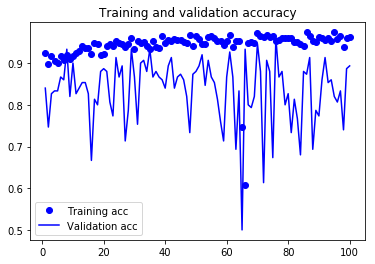

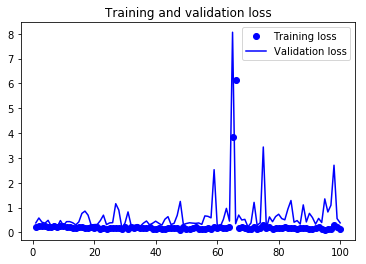

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 